In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
plt.style.use('dark_background')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import  ARIMA

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path='https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df=pd.read_csv(path,index_col='Month',parse_dates=True)

In [ ]:
df.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


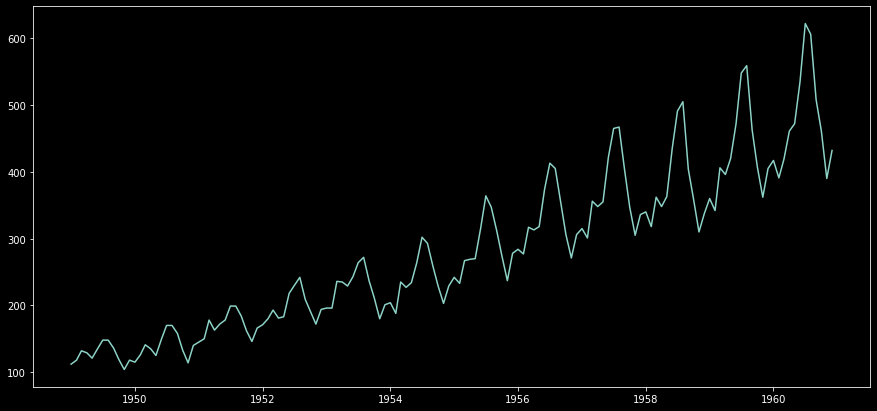

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df)

Check the series is stationary or not.

2 way for do that : 

      Rolling statistic
      Dicky-Fuller Test

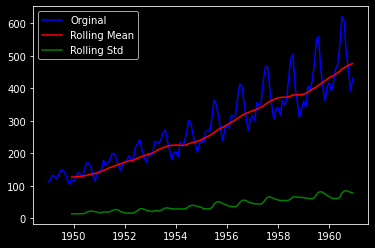

In [ ]:
# Rolling

rolling_mean=df.rolling(window=12).mean()
rolling_std=df.rolling(window=12).std()

plt.plot(df,color='blue',label='Orginal')
plt.plot(rolling_mean,color='red',label='Rolling Mean')
plt.plot(rolling_std,color='green',label='Rolling Std')
plt.legend(loc='best')
plt.show()


In [ ]:
#addifuller test

result=adfuller(df['Passengers'])
print('P value is :',result[1])

P value is : 0.9918802434376409


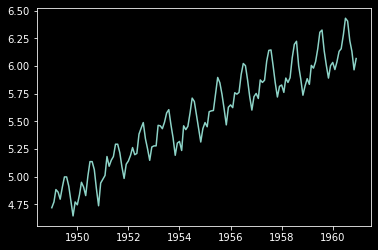

In [ ]:
df_log=np.log(df)
plt.plot(df_log)

In [ ]:
def get_stationary(timeseries):
  #statistics
  rolling_mean=timeseries.rolling(window=12).mean()
  rolling_std=timeseries.rolling(window=12).std()

  # plot
  orginal=plt.plot(timeseries,color='blue',label='Orginal')
  mean=plt.plot(rolling_mean,color='red',label='Rolling Mean')
  std=plt.plot(rolling_std,color='green',label='Rolling Std')
  plt.legend(loc='best')
  plt.show()


  #addifuller test

  result=adfuller(timeseries['Passengers'])
  print('P value is :',result[1])
  
  
  


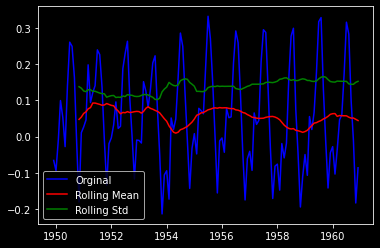

P value is : 0.022234630001244333


In [ ]:
#make stationary dataset

rolling_mean=df_log.rolling(window=12).mean()
df_log_minus_mean=df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)

get_stationary(df_log_minus_mean)

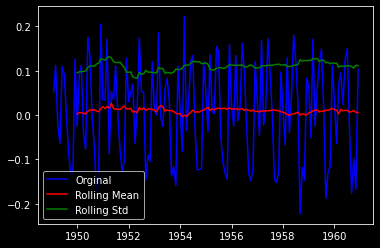

P value is : 0.07112054815086355


In [ ]:
#another way for make stationary

df_log_shift=df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationary(df_log_shift)

ARIMA model

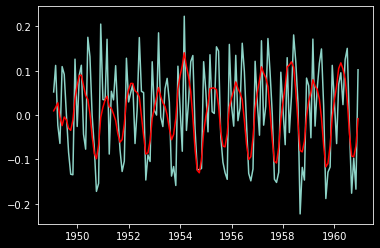

In [ ]:
decomposition=seasonal_decompose(df_log)
model=ARIMA(df_log,order=(2,1,2))
result=model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(result.fittedvalues,color='red')

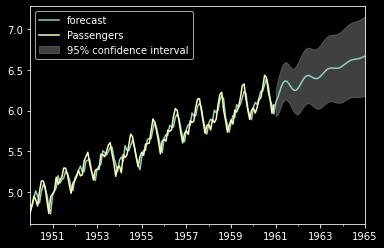

In [ ]:
pred=result.plot_predict('1950','1965')